In [13]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib.pyplot import figure


df = pd.read_csv(f"../data/input_data/MAIN_DATASET.csv", index_col=0)
df.head()

,index,NO2_price,NO2_load_actual,NO2_load_forecasted,NO2_load_delta,NO2_generation_actual,NO2_generation_forecast,NO2_generation_delta,NO5_price,NO5_load_actual,NO5_load_forecasted,NO5_load_delta,NO5_generation_actual,NO5_generation_forecast,NO5_generation_delta,NO2_Fyllingsgrad_NVE,NO5_Fyllingsgrad_NVE,dato_id,date_time
0,2016-01-03 12:00:00+01:00,16.37,5099,5223,124,16426,8473,-7953,17.94,2659,2542,-117,8802,4404,-4398,0.890802,0.759365,2016-01-03 12:00:00+01:00,2016-01-03-12
1,2016-01-03 13:00:00+01:00,16.35,5134,5246,112,16580,8452,-8128,17.66,2666,2567,-99,9022,4442,-4580,0.890601,0.759098,2016-01-03 13:00:00+01:00,2016-01-03-13
2,2016-01-03 14:00:00+01:00,16.35,5113,5234,121,16722,8486,-8236,17.66,2674,2561,-113,9308,4520,-4788,0.890400,0.758831,2016-01-03 14:00:00+01:00,2016-01-03-14
3,2016-01-03 15:00:00+01:00,16.30,5198,5303,105,17192,8576,-8616,17.60,2718,2614,-104,9946,4662,-5284,0.890199,0.758564,2016-01-03 15:00:00+01:00,2016-01-03-15
4,2016-01-03 16:00:00+01:00,16.45,5280,5419,139,17666,8896,-8770,18.61,2775,2641,-134,10378,4831,-5547,0.889998,0.758297,2016-01-03 16:00:00+01:00,2016-01-03-16


In [14]:
index = pd.date_range(start='2016-01-03-12', periods=len(df), freq="H")


freq_series = pd.DataFrame(df["NO2_price"])
freq_series["Datetime"] = index
freq_series = freq_series.set_index(["Datetime"])
freq_series.head()

,NO2_price
Datetime,
2016-01-03 12:00:00,16.37
2016-01-03 13:00:00,16.35
2016-01-03 14:00:00,16.35
2016-01-03 15:00:00,16.30
2016-01-03 16:00:00,16.45


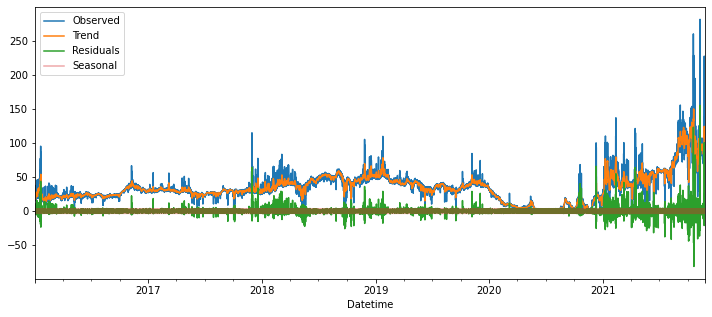

In [15]:
result = seasonal_decompose(freq_series, model='add')
observedarray = result.observed
seasonalarray = result.seasonal
trendarray = result.trend
residarray = result.resid
observedarray.plot(figsize=(12,5), label = "Observed")
trendarray.plot(figsize=(12,5), label = "Trend")
residarray.plot(figsize=(12,5), label= "Residuals")
seasonalarray.plot(figsize=(12,5),label= "Seasonal", alpha = 0.4)
plt.legend()

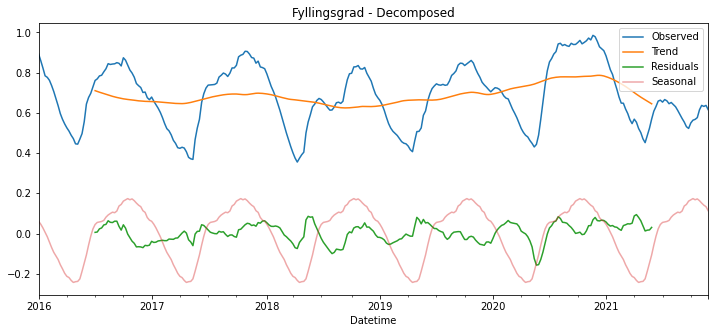

In [16]:
df_NVE = pd.read_csv(f"../data/input_data/magasin_statistikk_nve.csv", index_col=0)
df_NVE = df_NVE[df_NVE["omrnr" ]== 2]
df_NVE = df_NVE[df_NVE["omrType" ]== "EL"]
df_NVE['year'] = pd.DatetimeIndex(df_NVE['dato_Id']).year
df_NVE = df_NVE[df_NVE["year" ]>= 2016]

df_NVE.head()
df_NVE = df_NVE[["fyllingsgrad","dato_Id"]]
df_NVE = df_NVE.set_index(["dato_Id"])
df_NVE=df_NVE.sort_index()



index = pd.date_range(start='2016-01-03', periods=len(df_NVE), freq="W")

freq_series = pd.DataFrame(df_NVE["fyllingsgrad"])
freq_series["Datetime"] = index
freq_series = freq_series.set_index(["Datetime"])
freq_series.head()
result = seasonal_decompose(freq_series, model='add')
observedarray = result.observed
seasonalarray = result.seasonal
trendarray = result.trend
residarray = result.resid
observedarray.plot(figsize=(12,5), label = "Observed")
trendarray.plot(figsize=(12,5), label = "Trend")
residarray.plot(figsize=(12,5), label= "Residuals")
seasonalarray.plot(figsize=(12,5),label= "Seasonal", alpha = 0.4)
plt.title("Fyllingsgrad - Decomposed")
plt.legend()